# 1.0. Business Understanding


# Overview

The global telecommunications industry is known for intense competition and unpredictable business conditions, making it challenging for less resilient companies. Customer retention fluctuates dramatically due to factors such as economic downturns, rising costs, competitive alternatives, rapid technological advancements, globalization, government intervention, and various other influences.

# Problem Statement

Syria Telecommunications is grappling with the same challenges as other major telecom companies, but possibly at a more severe level. While the industry standard churn rate falls between 5% and 7%, Syria Telecommunications has seen its churn rate spike to nearly 15% at the time of data collection. In response, the company's management has tasked the Data Science Department with the responsibility of gathering, cleaning, and analyzing data to uncover the reasons behind this alarming rate and to propose practical solutions to address the issue.

# Business Problem

Despite the potential for booming profits and increased market share, Syria Telecommunications is experiencing a decline in customer retention. This downward trend threatens to steer the company away from its business objectives and hinder its growth.

# Objectives


To identify factors leading to increased churn rates

To create a classification model that predicts whether a customer will churn with a recall of over 80%

To give customer retention recommendations

# 2.0 Data understanding

The data was sourced from Kaggle.

There are 3333 records and 21 features in the data.

Associated columns included are:

State: The location of the customer.

Account Length: The number of days the account was held by the customer.

Area Code: The area code of the customer.

Phone Number: Phone number assigned to the user.

International Plan: Indicator of whether the customer has an international plan.

Voice Mail Plan: Indicator of whether the customer has a voicemail plan.

Number Vmail Messages: Number of voicemails sent.

Total Day Minutes: Number of minutes the customer has been in calls during the day.

Total Day Calls: Total calls made during the day.

Total Day Charge: Billed charge to the customer for all day calls.

Total Eve Minutes: Number of minutes the customer has been in calls during the evening.

Total Eve Calls: Total calls made during the evening.

Total Eve Charge: Billed charge to the customer for all evening calls.

Total Night Minutes: Number of minutes the customer has been in calls during the night.

Total Night Calls: Total calls made during the night.

Total Night Charge: Billed charge to the customer for all night calls.

Total Intl Minutes: Total number minutes on international calls.

Total Intl Calls: Total internation calls made.

Total Intl Charge: Billed charge to the customer for all international calls.

Customer Service Calls: Number of calls made to customer service.

Churn: Indication of whether the customer terminated their contract.

# 3.0 Data Preparation

We explore the data by understanding aspects of the data - including, loading the data, identifying the shape, features and data types, and understanding the summary statistics.

In [3]:
# Data Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and Metric Evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import recall_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
#import xgboost as xb

In [4]:
class DataPreparation():
    """
    This class takes a dataframe and returns some basic information.
    Consider making this ONE METHOD that returns everything.
    """
    def __init__(self, data):
        self.data = data
        
    def read_head(self):
        """Returns the first 5 rows"""
        return self.data.head()
    
    def read_columns(self):
        """Returns the columns of the DataFrame"""
        return self.data.columns
    
    def read_info(self):
        """Returns the features, datatypes and non-null count"""
        return self.data.info()
    
    def read_describe(self):
        """Returns the statistical summary of the dataset"""
        return self.data.describe()
    
    def read_shape(self):
        """Returns the number of rows and columns"""
        return self.data.shape
    
    def read_corr(self):
        """Returns a correlation dataframe"""
        return self.data.corr()
    
    def read_corr_wrt_target(self, target='churn'):
        """Returns a Series containing the correlation of features with respect to target"""
        return self.data.corr()[target].sort_values(ascending=False)
    
    def read_multicollinearity(self, target='churn'):
        """Returns a correlation dataframe without the target"""
        return self.data.corr().iloc[0:-1, 0:-1]
    
    def read_na(self):
        """Returns the sum of all null values per feature"""
        return self.data.isna().sum()
    
    def read_duplicated(self):
        """Returns the sum of all duplicated records"""
        return self.data.duplicated().sum()

In [5]:
# The data in DataFrame
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [6]:
# A data preparation Object Instatiated
dp = DataPreparation(data=df)

# First 5 lines of the DataFrame
dp.read_head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
# Explore the column names
dp.read_columns()

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [8]:
# Explore features and their datatypes
dp.read_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [9]:
# Explore the statistical summary
dp.read_describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [10]:
# Explore any correlations
dp.read_corr()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


In [11]:
# Investigating feature correlation within themselves
dp.read_multicollinearity()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288


# 4.0 Data Cleaning

# Missing Values

In [12]:
# Find the number of missing values
dp.read_na()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

# Duplicates

In [13]:
# Check for Duplicates
dp.read_duplicated()

0

# Conversion of feature datatypes

Convert the area code into a Categorical Dtype using pandas pd.Categorical

In [14]:
# Conversion of the 'area code' into a Categorical dtype
df['area code'] = pd.Categorical(df['area code'])
df['area code'].dtype

CategoricalDtype(categories=[408, 415, 510], ordered=False)

# Conversion of feature values

Convert the churn values using pandas .replace method

In [15]:
df['churn'] = df['churn'].replace([False, True], ['False', 'True'])

# Drop unnecessary columns

Drop the phone number feature

In [16]:
df = df.drop('phone number', axis=1)

# Test
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

## 5.0. Data Exploration

Split the data between the categorical columns and the numerical columns

In [17]:
# Split the Categorical columns from the Numerical Columns
num_cols = df.select_dtypes(include=['number', 'float', 'int']).columns
cat_cols = df.select_dtypes(exclude=['number', 'float', 'int']).columns

In [18]:
def view_value_counts(cat_columns):
    for item in cat_columns:
        print(item.capitalize())
        values = df[item].value_counts()
        print(values[:10] if len(values) > 10 else values)
        print("")
        
view_value_counts(cat_cols)

State
WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
VA     77
WY     77
CT     74
Name: state, dtype: int64

Area code
415    1655
510     840
408     838
Name: area code, dtype: int64

International plan
no     3010
yes     323
Name: international plan, dtype: int64

Voice mail plan
no     2411
yes     922
Name: voice mail plan, dtype: int64

Churn
False    2850
True      483
Name: churn, dtype: int64



Comment

Our top customers are come from West Virginia, Minesota and Virginia.

The area code with the highest clientelle base 415.

The ratio between customers without an international plan against those who do is around 10 to 1.

The ratio between customers who don't churn against those who do is around 17 to 1.

In [19]:
df.groupby('churn').median().loc[:,]

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
churn,,,,,,,,,,,,,,,
False,100,0,177.2,100,30.12,199.6,100,16.97,200.25,100,9.01,10.2,4,2.75,1
True,103,0,217.6,103,36.99,211.3,101,17.96,204.80,100,9.22,10.6,4,2.86,2


In [20]:
df.groupby('churn').mean().loc[:,]

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
churn,,,,,,,,,,,,,,,
False,100.793684,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
True,102.664596,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814


In [21]:
# Maintain seperate datasets were 'churn' is either True or False
stayed_df = df[df['churn']=='False']
left_df = df[df['churn']!='False']

 ## Which are some differentiating features between the customers who stayed versus those who left?

# Area Code

In [22]:
df['area code'].value_counts(normalize=True)

415    0.496550
510    0.252025
408    0.251425
Name: area code, dtype: float64

In [23]:
stayed_df['area code'].value_counts(), left_df['area code'].value_counts()

(415    1419
 408     716
 510     715
 Name: area code, dtype: int64,
 415    236
 510    125
 408    122
 Name: area code, dtype: int64)

In [24]:
stayed_df['area code'].value_counts(normalize=True), left_df['area code'].value_counts(normalize=True)

(415    0.497895
 408    0.251228
 510    0.250877
 Name: area code, dtype: float64,
 415    0.488613
 510    0.258799
 408    0.252588
 Name: area code, dtype: float64)

Area code 415 represents the area code where most of our customers stayed and left at the same time. The ratios between the stayed versus left customers seems consistent

# Customer Service Calls

In [25]:
stayed_df['customer service calls'].mean(), left_df['customer service calls'].mean()

(1.4498245614035088, 2.229813664596273)

In [26]:
csc_states = df.groupby(['state']).sum()[['customer service calls']].sort_values(by='customer service calls',ascending=False)[:10]
csc_states

,customer service calls
state,
WV,159
NY,142
OR,135
MN,130
VT,127
AL,125
VA,123
ID,122
IN,120


In [27]:
avg_css_states = df.groupby(['state']).mean()[['customer service calls']].sort_values(by='customer service calls',ascending=False)[:10]
avg_css_states

,customer service calls
state,
AR,1.981818
GA,1.925926
CO,1.787879
OK,1.786885
ME,1.741935
VT,1.739726
OR,1.730769
KY,1.711864
NY,1.710843


The mean of the number of calls made to the customer service center were considerably in those made by the customers who stayed.

The state with the highest number of calls to the service center in absolute terms was West Virginia, Oregon and New York.

From an average perspective, the highest averages per state to the customer service centers were from Arizona, Georgia and Colarado.

# Domestic Plans

## Minutes purchased throughout the three periods - day, evening and night

In [28]:
stayed_min = (stayed_df['total day minutes'] + stayed_df['total eve minutes'] + stayed_df['total night minutes']).mean()
left_min = (left_df['total day minutes'] + left_df['total eve minutes'] + left_df['total night minutes']).mean()

stayed_min, left_min

(574.352245614035, 624.555900621118)

The mean of the minutes purchased by the customers for domestic usage who left was significantly more than those who stayed

# Total Charges across the three periods - day, evening and night

In [29]:
stayed_charges = (stayed_df['total day charge'] + stayed_df['total eve charge'] + stayed_df['total night charge']).mean()
left_charges = (left_df['total day charge'] + left_df['total eve charge'] + left_df['total night charge']).mean()

stayed_charges, left_charges

(55.70540350877194, 62.466418219461694)

The mean of the charges for domestic usage for the customers who left was significantly more than those who stayed.

# International Plans

## International Plans Opted

In [30]:
stayed_df['international plan'].value_counts(normalize=True), left_df['international plan'].value_counts(normalize=True)

(no     0.934737
 yes    0.065263
 Name: international plan, dtype: float64,
 no     0.716356
 yes    0.283644
 Name: international plan, dtype: float64)


6% of the proportion of consumers who stayed had an international plan while 28% of the customers who left had an international plan connected with their account.

## Total International Plans - Minutes and Charges

In [31]:
df.groupby(['churn', 'international plan']).mean().iloc[:, -4:-1]

total intl minutes  total intl calls  \
churn international plan                                         
False no                           10.185473          4.493243   
      yes                           9.777957          5.102151   
True  no                           10.271387          4.251445   
      yes                          11.782482          3.941606   

                          total intl charge  
churn international plan                     
False no                           2.750586  
      yes                          2.640538  
True  no                           2.774017  
      yes                          3.181314

In [32]:
stayed_df['total intl minutes'].mean(), left_df['total intl minutes'].mean()

(10.158877192982455, 10.700000000000001)

In [33]:
stayed_df['total intl charge'].mean(), left_df['total intl charge'].mean()

(2.7434035087719297, 2.8895445134575573)

The data indicates higher average values in terms of minutes purchased and bill charged to the consumers who left over those who stayed.

# Account Lengths

## Account Lengths Exploration

In [34]:
stayed_df['account length'].mean(), left_df['account length'].mean()

(100.79368421052632, 102.66459627329192)

##  Account Lengths and States

In [35]:
df.groupby(['state']).mean()[['account length']].sort_values(by='account length', ascending=False)[:10]

,account length
state,
FL,109.571429
OK,108.262295
LA,108.235294
KS,106.785714
ND,106.209677
VA,105.935065
WY,105.740260
DC,105.722222
HI,105.471698


## Account Lengths against Customer Service Calls

In [36]:
df.groupby(['churn', 'customer service calls']).mean()[['account length']]

account length
churn customer service calls                
False 0                           101.550413
      1                           101.386213
      2                            99.197917
      3                           100.142857
      4                           100.333333
      5                           109.192308
      6                           100.875000
      7                           125.000000
      8                            64.000000
True  0                            99.673913
      1                           105.196721
      2                            99.436782
      3                           112.727273
      4                           105.421053
      5                            98.250000
      6                            84.071429
      7                           109.000000
      8                           103.000000
      9                           102.500000

The customers who left held on their accounts longer than the customers who stayed.

On average, customers from Florida, Oklahoma and Los Angeles had the highest account lengths than all other customers in America.

In addition, customers who left and had longer account lengths seemed to have made more calls to the service centers than the customers who stayed.

# COMMENTS


Area codes 415, 408 and 510 share proportions 50%, 25%, and 25% respectively representing the proportion of customers in each area code. The proportions hold true when comparing the data for the customers who churned and those who did not.

The mean number of calls to custmomer service were significantly more in the customers who left than those who stayed.

The mean amount of day minutes and their mean charges for customers who left were significantly more than the customers who stayed.

Only 6% of the customers who stayed did had an international plan whereas 28% of the customers who left had an international plan.

The minutes spent on international calls were higher in the customers who left over the customers who stayed.

The average international call charge was higher in the customers who churned over the customers who stayed.

Account lengths held by the customers who left were slightly more than those held by the customers who stayed.

# 6.0 Data Visualisation

## Univariate Analysis

In [37]:
def univariate_plot(col):
    # Style
#     plt.style.use('_mpl-gallery')
    if col in num_cols:

        # plot:
        fig, ax = plt.subplots(figsize=(8, 6))

        ax.hist(df[col], bins=20, linewidth=0.5, edgecolor="white")

        plt.suptitle(f'Distribution of the {col.capitalize()}', fontsize=14)
        
        ax.set_xlabel(f'{col.capitalize()}')
        
        ax.set_ylabel('Distribution')
        
        plt.show()
        
    else:

        # plot:
        fig, ax = plt.subplots(figsize=(8, 6))
        
        data = df[col].value_counts(sort=True)
        
        ax.bar(data.index[:10] if len(data) > 10 else data.index, 
               data.values[:10] if len(data) > 10 else data.values, 
               linewidth=0.5, edgecolor="white")

        plt.suptitle(f'Distribution of the {col.capitalize()}', fontsize=14)
        
        ax.set_ylabel('Distribution')
        
        plt.show()

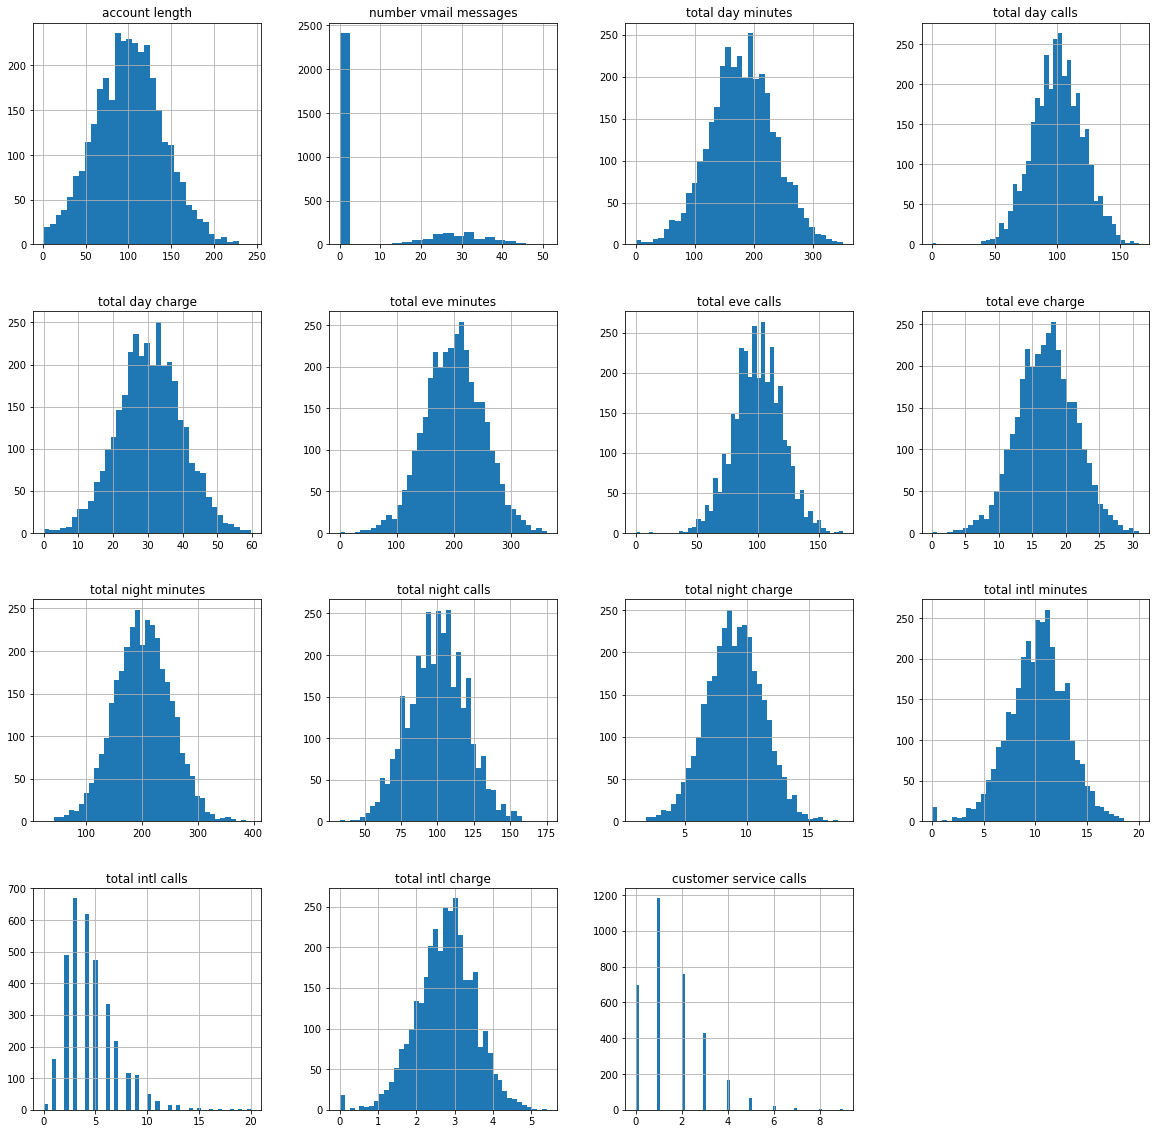

In [38]:
df.hist(bins='auto',figsize=(20,20));

## COMMENT


Almost all of the distributions reveal a normal distribution of the features.

It is worth noting that the distribution of customer service calls and total intl callsare right-tailed.

The number vmail messages feature also displays a strange distribution illustrating that alot users opted out of sending/ receiving voice mail messages and very few other people decided to have the voice mail messages.

## Visualisation of Categorical features

## Churn

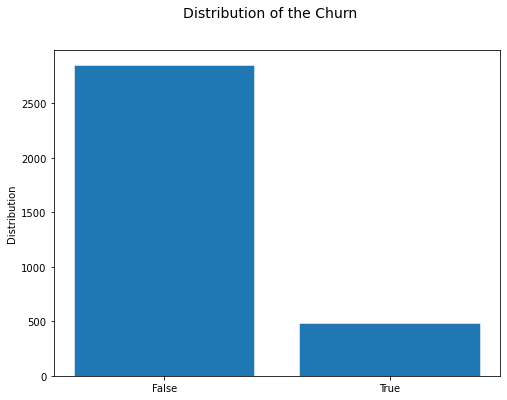

In [39]:
univariate_plot('churn')

Almost 15% the customers churned while the rest stayed with Syria Telecommunications.

## State

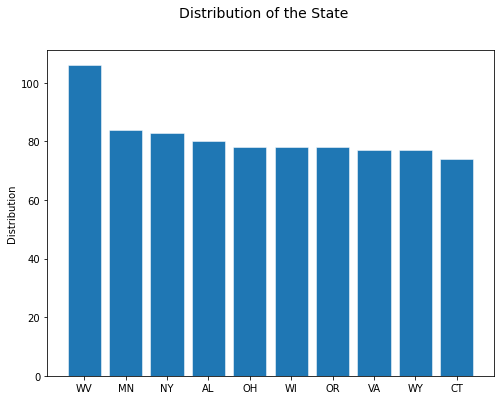

In [40]:
univariate_plot('state')

West Virginia, Minnesota and New York contain most of Syria Telecommunications customers

# International Plan

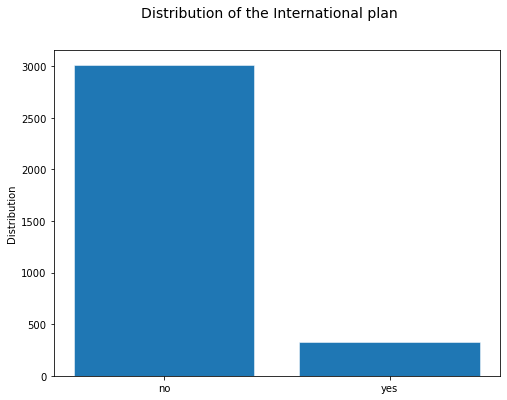

In [41]:
univariate_plot('international plan')

In [42]:
df['international plan'].value_counts(normalize=True)

no     0.90309
yes    0.09691
Name: international plan, dtype: float64

Near 10% of the customers have an international plan

# Area Code

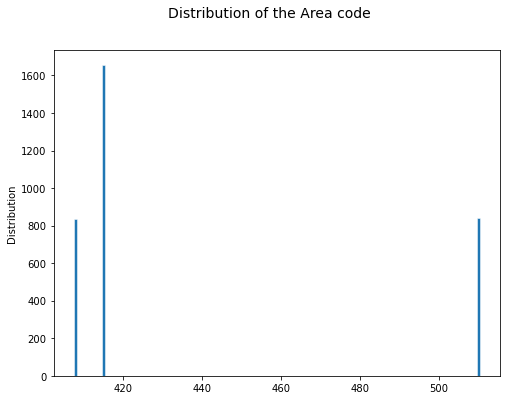

In [43]:
univariate_plot('area code')

Most of the customers came from the 410 area code region.

# Voice Mail plans

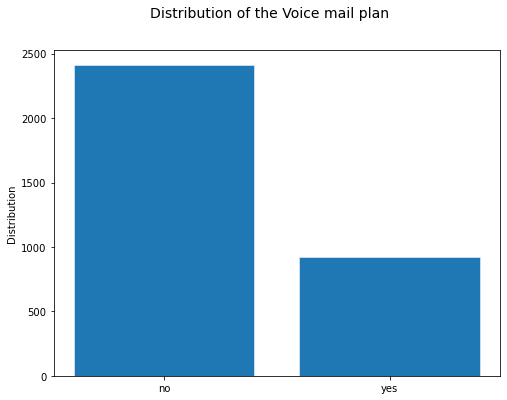

In [44]:
univariate_plot('voice mail plan')

In [45]:
df['voice mail plan'].value_counts(normalize=True)

no     0.723372
yes    0.276628
Name: voice mail plan, dtype: float64

Nearly 28% of the customers have a voice mail plan.

## Visualisation of Numerical columns

# Account Length

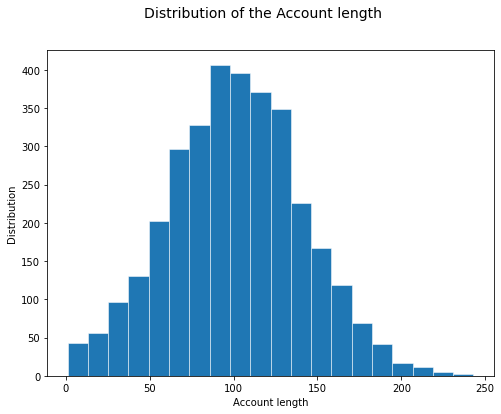

In [46]:
univariate_plot('account length')

A normal distribuition of the account length feature with the mean and median being around 100.

## Customer Service Calls

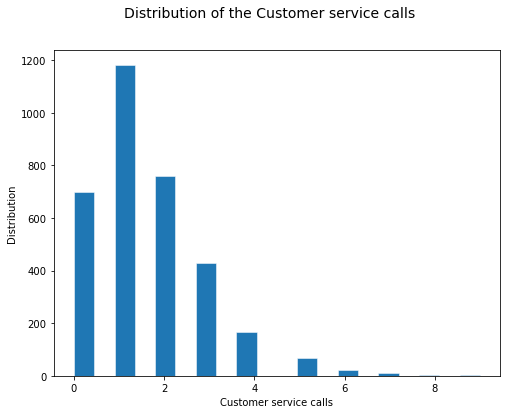

In [47]:
univariate_plot('customer service calls')

A right tailed customer service showing a lot of the customers have called the customer service at least 2 and fewer people have called more than twice.

##  International Calls

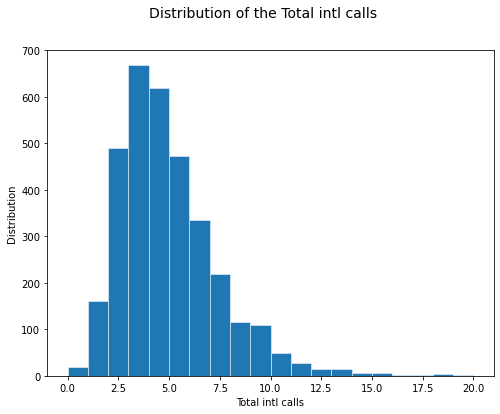

In [48]:
univariate_plot('total intl calls')

This right tailed feature shows it peaked at the 3 call mark and a sharp declined soon follows. Very few people made more than 3 calls.

## Total Day Calls

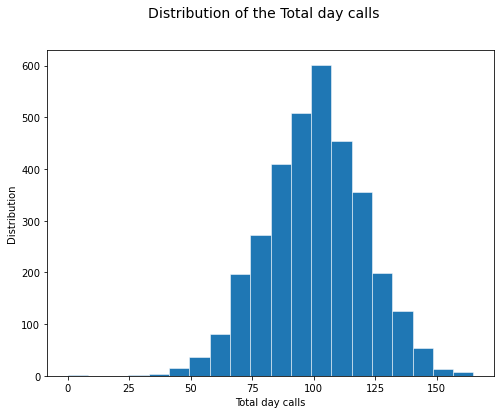

In [49]:
univariate_plot('total day calls')

A near normal distribution of the total day calls feature peaking at around 100 day calls.

## Total Evening Calls

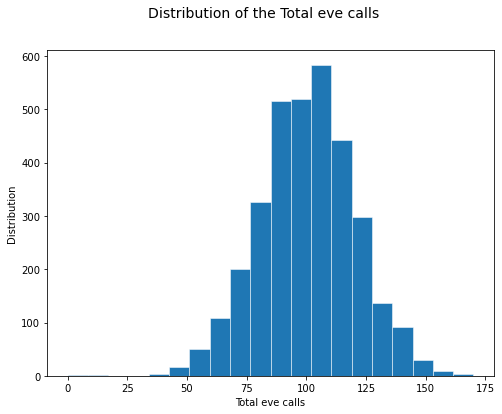

In [50]:
univariate_plot('total eve calls')

A near normal distribution of the total eve calls feature peaking at around 100 evening calls.

## Total Night Calls

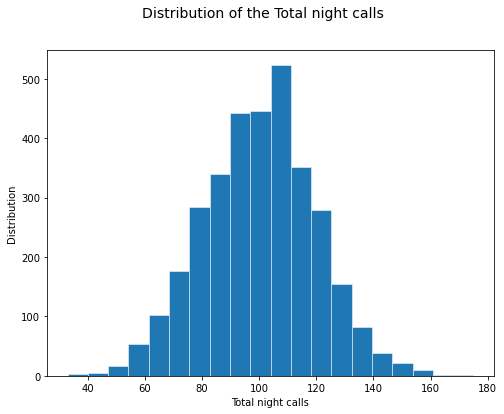

In [51]:
univariate_plot('total night calls')

## COMMENTS


The number of people who stayed outweighed the number of people who churned.

The univariate analysis visually told us that most of our customers came from teh 410 area code.

The state with the highest number of customers was Washington

The distributions of the Account Length was normally distributed

The distributions of the Customer Service calls and Total Intl Calls were right tailed.

The distributions of the Total Day Calls, Total Eve Calls and Total Night were left-tailed.

## Visualisation of Outliers

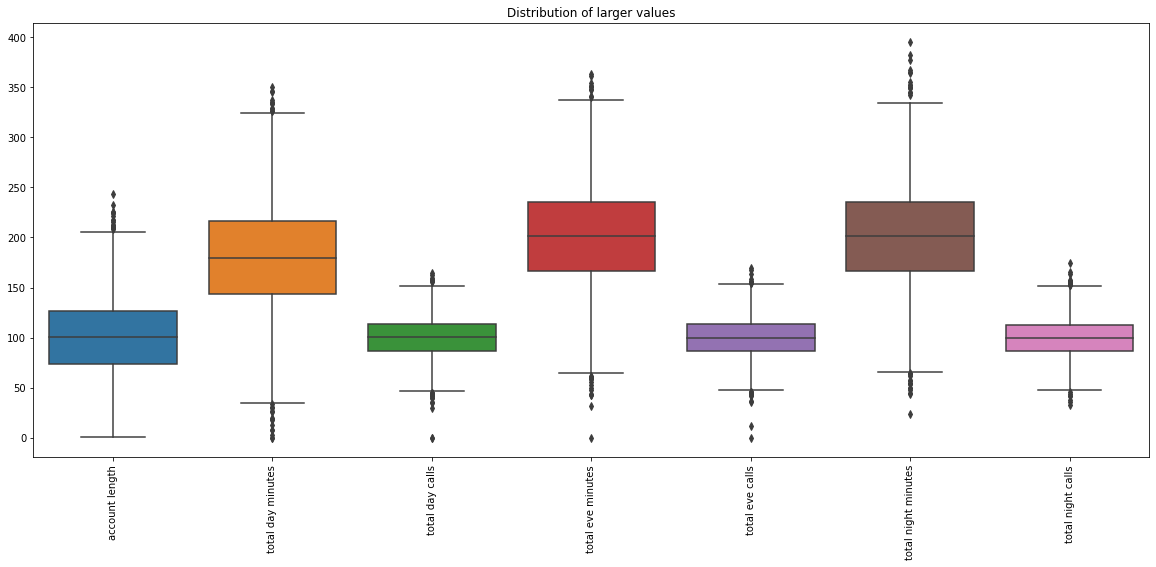

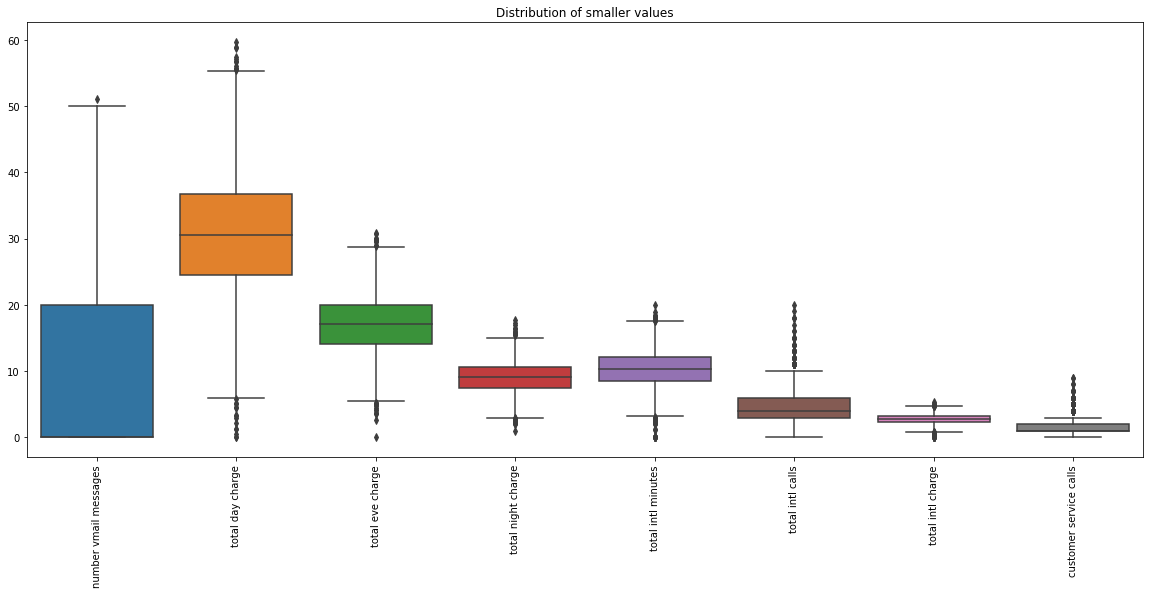

In [52]:
#Checking for outliers in the data
# List of columns for the first boxplot
large_box = ['account length','total day minutes','total day calls', 'total eve minutes',
             'total eve calls','total night minutes','total night calls']

# List of columns for the second boxplot
small_box = ['number vmail messages', 'total day charge', 'total eve charge', 'total night charge',
             'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

def plot_boxplots(lists, larger=True, title=None):
    fig, axes = plt.subplots(figsize=(20, 8))

    sns.boxplot(data=df[lists], ax=axes)
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
    
    if title == None:
        axes.set_title('Distribution of' + (' larger values' if larger == True else ' smaller values'))

    # Show the plot
    plt.show()
    
plot_boxplots(large_box)
plot_boxplots(small_box, larger=False)

## Bivariate Analysis